In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dataViz", timeout = 15)


import branca
import branca.colormap as cm

import folium

In [4]:
from git import Git# updating the John Hopkins dataset

jh_repo = Git('COVID-19')
jh_repo.pull('origin', 'master')

'Already up to date.'

In [41]:
data = pd.read_excel('20200402_acaps_-_covid-19_goverment_measures_dataset_v4.xlsx', 'Database')

confirmed = pd.read_csv('Corona-Virus-Dataset/time_series_covid_19_confirmed.csv')

# For the confirmed cases on the updated dataset use this:
#confirmed = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths = pd.read_csv('Corona-Virus-Dataset/time_series_covid_19_deaths.csv')

# For the dead cases on the updated dataset use this:
#deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# For the recovered cases on the updated dataset use this:
#deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# The active cases can be recovered by subtracting recovered from confirmed

Only keep eleven pre-selected countries

In [42]:
countries = np.sort(['Switzerland', 'Germany', 'Netherlands', 'Sweden', 'Italy', 'United Kingdom', 'Spain', 'Belgium', 'Austria', 'Finland', 'Norway'])

data = data[data['COUNTRY'].isin(countries)]
confirmed = confirmed[confirmed['Country/Region'].isin(countries)]
deaths = deaths[deaths['Country/Region'].isin(countries)]

In [43]:
data.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
188,405,Austria,AUT,NaN,NaN,Europe,Lockdown,Partial lockdown,No,Citizens are suspend all non-essential activit...,Fines,2020-03-16,Ministry of Social Affairs,Government,https://www.sozialministerium.at/Informationen...,2020-03-15,NaN
189,407,Austria,AUT,NaN,NaN,Europe,Social distancing,Limit public gatherings,No,ban of public gatherings over 5 people; closur...,Not applicable,2020-03-16,Ministry of Social Affairs,Government,https://www.sozialministerium.at/Informationen...,2020-03-15,NaN
190,408,Austria,AUT,NaN,NaN,Europe,Movement restrictions,Visa restrictions,Yes,"entry ban for travelers from Great Britain, Ne...",Not applicable,2020-03-16,Ministry of Social Affairs,Government,https://www.sozialministerium.at/Informationen...,2020-03-15,NaN
191,409,Austria,AUT,NaN,NaN,Europe,Social distancing,Schools closure,No,schools and education institutions closed star...,Not applicable,2020-03-16,Government,Government,https://www.oesterreich.gv.at/themen/coronavir...,2020-03-15,NaN
192,410,Austria,AUT,NaN,NaN,Europe,Social and economic measures,Economic measures,No,announcement of economic measures including lo...,Not applicable,2020-03-14,Government,Government,https://www.oesterreich.gv.at/themen/coronavir...,2020-03-15,NaN


### Display countries in a map with some information

In [44]:
def country_to_coord(country):
    lat = geolocator.geocode(country).latitude
    long =  geolocator.geocode(country).longitude
    return lat, long

Assign latitude and longitude to each country

In [45]:
acc = [country_to_coord(countries[i]) for i in tqdm(range(len(countries)))]

100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


In [37]:
deaths_now = deaths.groupby('Country/Region').sum().iloc[:,-1].reset_index()
confirmed_now = confirmed.groupby('Country/Region').sum().iloc[:,-1].reset_index()


In [40]:
colormap = cm.LinearColormap(colors=['red','lightblue'], index=[50,100],vmin=90,vmax=100)

map = folium.Map(location=(46.7985624, 8.2319736), zoom_start=4)


lat = [x[0] for x in acc]
lon = [x[1] for x in acc]

number_deaths = list(deaths['3/20/20'])


for loc, p in zip(zip(lat, lon), number_deaths):
    if p > 0:
        folium.Circle(
            location=loc,
            radius=10,
            fill=True,
            color=colormap(p),
            #fill_opacity=0.7
        ).add_to(map)

for i in range(deaths_now.shape[0]):
    each = deaths_now.iloc[i,:]
    each2 = confirmed_now.iloc[i,:]
    text = 'Country/Region: ' + each['Country/Region'] + '\n Number of deaths: ' + str(each['3/20/20']) + '\n Number of confirmed: ' + str(each2['3/20/20'])
    folium.Marker(
            location = acc[i], tiles="Mapbox Bright", popup=text).add_to(map)

map.add_child(colormap)

display(map)

KeyError: '3/20/20'

### Plot number of confirmed cases per country, number of deaths per country

In [14]:
cols = ['Lat', 'Long']

deaths = deaths.groupby('Country/Region').sum().drop(cols, 1)

In [15]:
confirmed = confirmed.groupby('Country/Region').sum().drop(cols, 1)


## Confirmed for one country and multiple countries

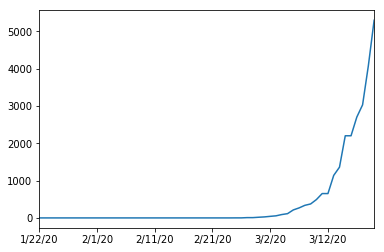

In [145]:
import matplotlib.pyplot as plt


country = 'Switzerland'


x = confirmed.loc[country]

plt.figure()
x.plot()

In [16]:
countries = np.sort(['Switzerland', 'Germany', 'Netherlands', 'Sweden', 'Italy', 'United Kingdom', 'Spain', 'Belgium', 'Austria', 'Finland', 'Norway'])

x = confirmed.loc[countries].iloc[:,2:]

x.T.plot()

## Deaths for one country and multiple countries

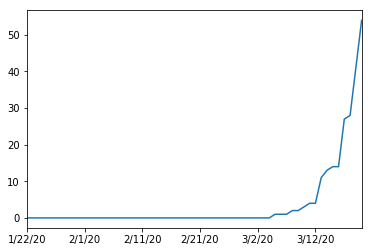

In [17]:
import matplotlib.pyplot as plt


country = 'Switzerland'


x = deaths.loc[country]

plt.figure()
x.plot()

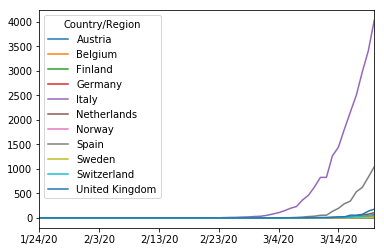

In [18]:
#select countries that we want
countries = np.sort(['Switzerland', 'Germany', 'Netherlands', 'Sweden', 'Italy', 'United Kingdom', 'Spain', 'Belgium', 'Austria', 'Finland', 'Norway'])

x = deaths.loc[countries].iloc[:,2:]

x.T.plot()